# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('billboard_songs_artist.csv')
df2 = pd.read_csv('audio_features_chorus.csv')

In [3]:
df1.head()

Song     Artist  Label  \
0            Break Da Law  21 Savage      1   
1       Out For The Night  21 Savage      1   
2                     1.5  21 Savage      1   
3                   A Lot  21 Savage      1   
4  Can't Leave Without It  21 Savage      1   

                                   YouTube_URL  
0  https://www.youtube.com/watch?v=whxKTWgG1ds  
1  https://www.youtube.com/watch?v=BXd04k_NFLE  
2  https://www.youtube.com/watch?v=X473_RaP3K0  
3  https://www.youtube.com/watch?v=DmWWqogr_r8  
4  https://www.youtube.com/watch?v=l5M64JuiZAE

In [4]:
# Checking top 5 rows
df2.head()

file_name       tempo  \
0                                 $ave Dat Money.mp3  143.554688   
1                                 'Til You Can't.mp3  161.499023   
2                           'Tis The Damn Season.mp3  143.554688   
3  (There's No Place Like) Home For The Holidays ...  143.554688   
4  (There's No Place Like) Home For The Holidays ...  143.554688   

                                               beats      rmse  \
0  [ 35  53  72  90 108 127 145 163 181 199 215 2...  0.131718   
1  [ 15  32  48  64  80  97 112 129 145 161 177 1...  0.196250   
2  [  3  20  37  55  73  90 108 125 143 161 179 1...  0.120155   
3  [ 25  43  62  81 101 121 139 157 177 195 213 2...  0.078470   
4  [ 25  43  62  81 101 121 139 157 177 195 213 2...  0.078470   

   spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0        2632.320794         2372.917606       5119.556514   
1        1810.599322         2194.320910       3581.955912   
2        1584.100046         2084.415252       3280.241263   
3        1498.103351         1827.867003       3014.573496   
4        1498.103351         1827.867003       3014.573496   

                                   spectral_contrast  zero_crossing_rate  \
0  [18.89248251 14.29424403 16.3406219  16.182858...            0.131132   
1  [23.29762307 17.91057646 21.82578342 22.076868...            0.071333   
2  [25.65984118 19.18240921 21.6970813  18.979711...            0.054243   
3  [24.30769191 21.12306594 22.87111098 21.187342...            0.058859   
4  [24.30769191 21.12306594 22.87111098 21.187342...            0.058859   

                                             tonnetz  ...    mfcc_16  \
0  [ 0.01564716 -0.02259803  0.01584242 -0.058355...  ...  -1.497291   
1  [-0.24242595 -0.0523792  -0.13923181  0.038244...  ... -11.966074   
2  [ 0.05820097  0.27636922 -0.10143634  0.046174...  ...  -2.875584   
3  [-0.01488395  0.06577399  0.02980826 -0.044310...  ...  -1.896823   
4  [-0.01488395  0.06577399  0.02980826 -0.044310...  ...  -1.896823   

    mfcc_17    mfcc_18   mfcc_19  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  \
0  1.251131  -2.883872  3.331189   0.015647  -0.022598   0.015842  -0.058356   
1 -6.709518 -10.335267 -0.258811  -0.242426  -0.052379  -0.139232   0.038244   
2  0.596127   2.130064 -0.560888   0.058201   0.276369  -0.101436   0.046175   
3 -5.473867  -2.663608 -4.265886  -0.014884   0.065774   0.029808  -0.044311   
4 -5.473867  -2.663608 -4.265886  -0.014884   0.065774   0.029808  -0.044311   

   tonnetz_4  tonnetz_5  
0   0.007895   0.027080  
1   0.007991  -0.043701  
2  -0.045359  -0.021143  
3   0.008306  -0.011405  
4   0.008306  -0.011405  

[5 rows x 79 columns]

In [5]:
# df2 = df2.drop(columns=['spectral_contrast'])
df2 = df2.drop(columns=['tonnetz'])

In [6]:
df2.rename(columns={'file_name': 'Song'}, inplace=True)

In [7]:
df2['Song'] = df2['Song'].str.replace('.mp3', '')

In [8]:
# Merge df1 and df2 based on the "Song" column
final_df = pd.merge(df1, df2, on='Song', how='left')

In [9]:
final_df.head()

Song     Artist  Label  \
0            Break Da Law  21 Savage      1   
1       Out For The Night  21 Savage      1   
2                     1.5  21 Savage      1   
3                   A Lot  21 Savage      1   
4  Can't Leave Without It  21 Savage      1   

                                   YouTube_URL       tempo  \
0  https://www.youtube.com/watch?v=whxKTWgG1ds  143.554688   
1  https://www.youtube.com/watch?v=BXd04k_NFLE  172.265625   
2  https://www.youtube.com/watch?v=X473_RaP3K0   83.354335   
3  https://www.youtube.com/watch?v=DmWWqogr_r8  143.554688   
4  https://www.youtube.com/watch?v=l5M64JuiZAE  135.999178   

                                               beats      rmse  \
0  [ 20  36  55  75  94 112 131 148 167 184 204 2...  0.255377   
1  [ 15  30  45  60  75  90 105 120 135 149 163 1...  0.264122   
2  [ 16  47  77 108 139 170 201 232 263 293 323 3...  0.376883   
3  [  3  20  37  55  74  92 109 127 145 162 180 1...  0.297056   
4  [ 16  34  52  70  89 108 126 146 166 186 205 2...  0.262961   

   spectral_centroid  spectral_bandwidth  spectral_rolloff  ...   mfcc_16  \
0        2469.284500         2551.212317       5280.168729  ...  6.688837   
1        2395.214782         2619.288219       5265.804933  ...  1.146237   
2        2013.544292         2440.739148       4593.616771  ... -0.468588   
3        1896.583680         2452.158667       4405.838246  ... -2.380342   
4        2389.685530         2346.994035       4792.798899  ... -7.321148   

    mfcc_17   mfcc_18   mfcc_19  tonnetz_0  tonnetz_1  tonnetz_2  tonnetz_3  \
0  5.565449  4.796187  6.862892  -0.175159   0.008132   0.250793  -0.013915   
1  4.392690  5.154679  3.562679   0.056771  -0.059867  -0.002673   0.031397   
2  3.437206  5.415416  4.918856  -0.065860   0.045349  -0.057149   0.146700   
3  8.842171  4.495227  2.871886  -0.010795   0.079731  -0.014852   0.084052   
4 -0.696784 -0.954105 -2.203774  -0.047500  -0.092103  -0.039246  -0.083387   

   tonnetz_4  tonnetz_5  
0  -0.002307   0.104079  
1   0.033024   0.045803  
2   0.055221   0.035185  
3  -0.004455   0.029610  
4   0.007345   0.027271  

[5 rows x 81 columns]

In [10]:
# Checking for null values in each column
final_df.isnull().sum()

Song            0
Artist          0
Label           0
YouTube_URL     0
tempo          15
               ..
tonnetz_1      15
tonnetz_2      15
tonnetz_3      15
tonnetz_4      15
tonnetz_5      15
Length: 81, dtype: int64

In [11]:
# Removing rows with null values
final_df.dropna(inplace=True)

In [12]:
final_df.isnull().sum()

Song           0
Artist         0
Label          0
YouTube_URL    0
tempo          0
              ..
tonnetz_1      0
tonnetz_2      0
tonnetz_3      0
tonnetz_4      0
tonnetz_5      0
Length: 81, dtype: int64

In [13]:
# Data Info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 929
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 915 non-null    object 
 1   Artist               915 non-null    object 
 2   Label                915 non-null    int64  
 3   YouTube_URL          915 non-null    object 
 4   tempo                915 non-null    float64
 5   beats                915 non-null    object 
 6   rmse                 915 non-null    float64
 7   spectral_centroid    915 non-null    float64
 8   spectral_bandwidth   915 non-null    float64
 9   spectral_rolloff     915 non-null    float64
 10  spectral_contrast    915 non-null    object 
 11  zero_crossing_rate   915 non-null    float64
 12  chroma_stft_0        915 non-null    float64
 13  chroma_stft_1        915 non-null    float64
 14  chroma_stft_2        915 non-null    float64
 15  chroma_stft_3        915 non-null    float64


In [14]:
# Statistical Summary
final_df.describe().T

count         mean         std          min          25%  \
Label               915.0     0.901639    0.297965     0.000000     1.000000   
tempo               915.0   122.824019   28.751459    48.754422    99.384014   
rmse                915.0     0.190480    0.091630     0.005688     0.117225   
spectral_centroid   915.0  2115.780246  457.161526   735.760354  1818.203118   
spectral_bandwidth  915.0  2332.961635  343.353688  1050.980075  2132.736853   
...                   ...          ...         ...          ...          ...   
tonnetz_1           915.0     0.007701    0.107831    -0.355678    -0.061853   
tonnetz_2           915.0    -0.004555    0.078836    -0.396243    -0.048944   
tonnetz_3           915.0     0.004799    0.076063    -0.408389    -0.035367   
tonnetz_4           915.0     0.002886    0.024422    -0.156881    -0.008359   
tonnetz_5           915.0     0.002108    0.026369    -0.095093    -0.010732   

                            50%          75%          max  
Label                  1.000000     1.000000     1.000000  
tempo                123.046875   143.554688   215.332031  
rmse                   0.191821     0.260948     0.456483  
spectral_centroid   2124.548806  2448.063800  3474.297443  
spectral_bandwidth  2397.704830  2584.771174  3115.328550  
...                         ...          ...          ...  
tonnetz_1              0.011066     0.075004     0.375493  
tonnetz_2             -0.007454     0.038355     0.325201  
tonnetz_3              0.003728     0.047050     0.374146  
tonnetz_4              0.002488     0.014588     0.146056  
tonnetz_5              0.000778     0.013010     0.190976  

[76 rows x 8 columns]

In [15]:
# Specifying the columns for each group
tonnetz_columns = final_df.loc[:, 'tonnetz_0':'tonnetz_5']
mfcc_columns = final_df.loc[:, 'mfcc_0':'mfcc_19']
spectral_contrast_columns = final_df.loc[:, 'spectral_contrast_0':'spectral_contrast_6']
chroma_cens_columns = final_df.loc[:, 'chroma_cens_0':'chroma_cens_11']
chroma_cqt_columns = final_df.loc[:, 'chroma_cqt_0':'chroma_cqt_11']
chroma_stft_columns = final_df.loc[:, 'chroma_stft_0':'chroma_stft_11']

# Calculating mean for each group
final_df['tonnetz_mean'] = tonnetz_columns.mean(axis=1)
final_df['mfcc_mean'] = mfcc_columns.mean(axis=1)
final_df['spectral_contrast_mean'] = spectral_contrast_columns.mean(axis=1)
final_df['chroma_cens_mean'] = chroma_cens_columns.mean(axis=1)
final_df['chroma_cqt_mean'] = chroma_cqt_columns.mean(axis=1)
final_df['chroma_stft_mean'] = chroma_stft_columns.mean(axis=1)

# Now DataFrame contains new columns which contain the means of corresponding columns

In [16]:
# Exporting the dataframe to new csv file
final_df.to_csv('final_data.csv')

# Data Analysis And Visualization

In [17]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

In [18]:
# Creating Histogram plot to check for distribution of values

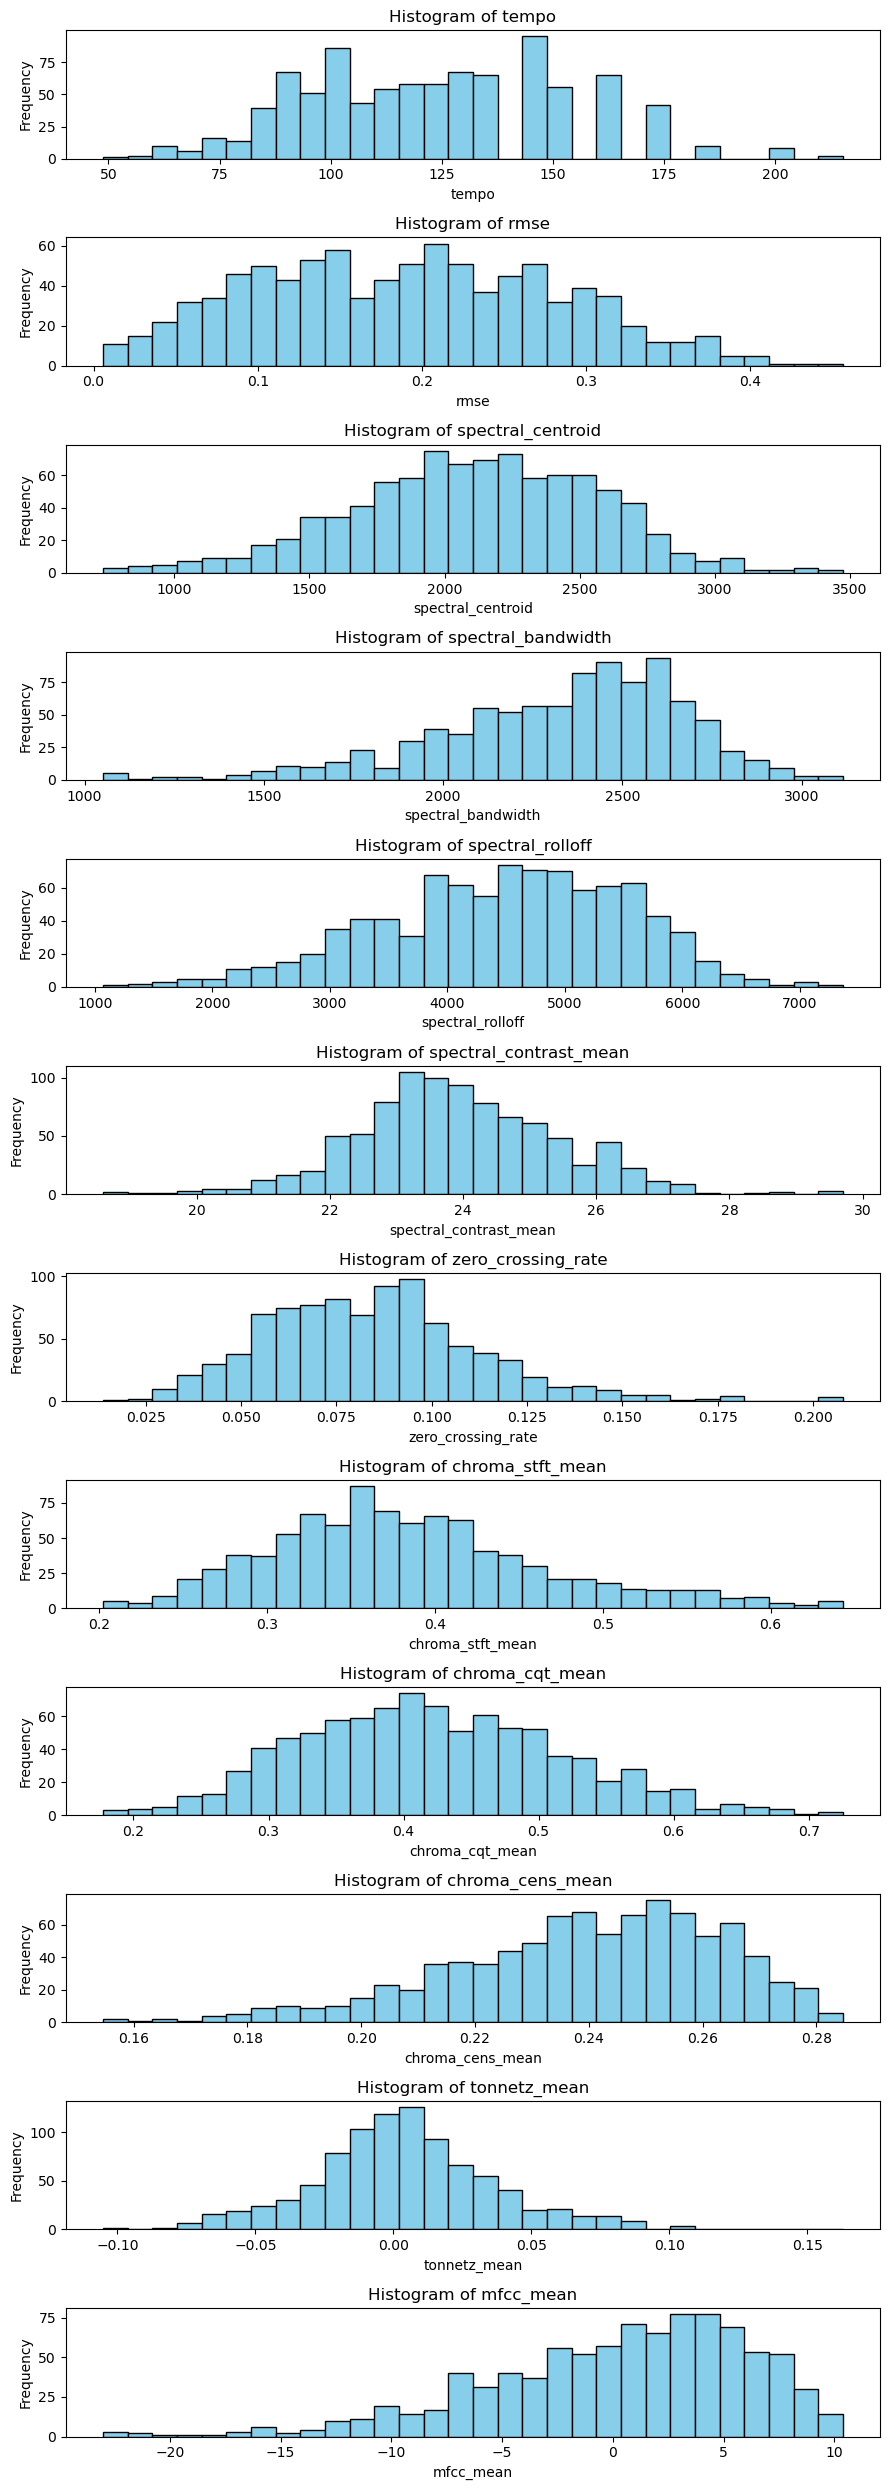

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating subset of numeric columns for histogram plotting
numeric_columns = ['tempo', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'spectral_contrast_mean', 'zero_crossing_rate', 'chroma_stft_mean', 'chroma_cqt_mean', 'chroma_cens_mean', 'tonnetz_mean', 'mfcc_mean']

# Plotting histograms for numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(9, 25))

for i, col in enumerate(numeric_columns):
    axes[i].hist(final_df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

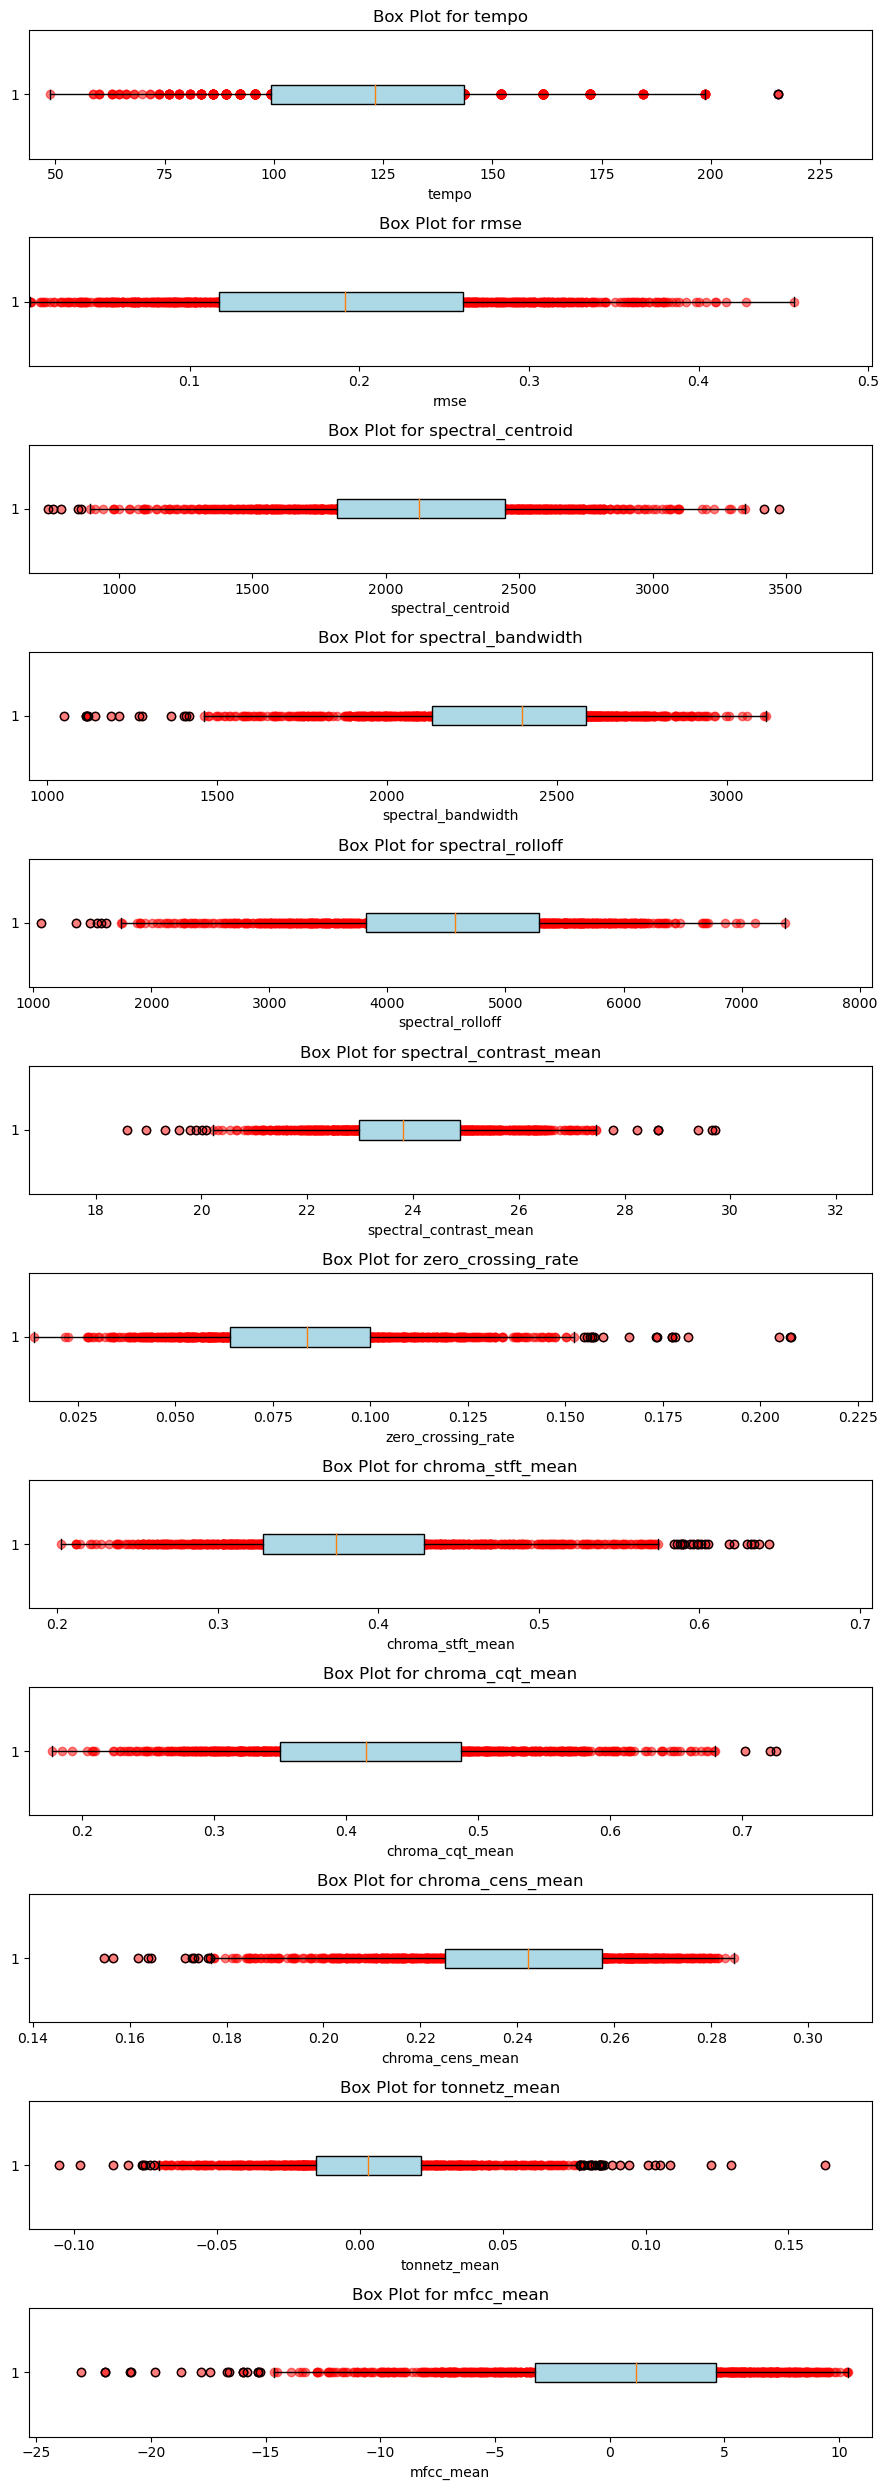

In [20]:
# Plotting enhanced box plots for numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(9, 25))

for i, col in enumerate(numeric_columns):
    boxplot = axes[i].boxplot(final_df[col], vert=False, patch_artist=True)
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)

    # Customizing box plot colors
    colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    # Showing outliers explicitly
    axes[i].scatter(final_df[col], [1] * len(final_df[col]), color='red', alpha=0.5, label='Outliers')

    # Adjusting whisker length
    axes[i].set_xlim([min(final_df[col]) - 0.1 * abs(min(final_df[col])), max(final_df[col]) + 0.1 * abs(max(final_df[col]))])

plt.tight_layout()
plt.show()


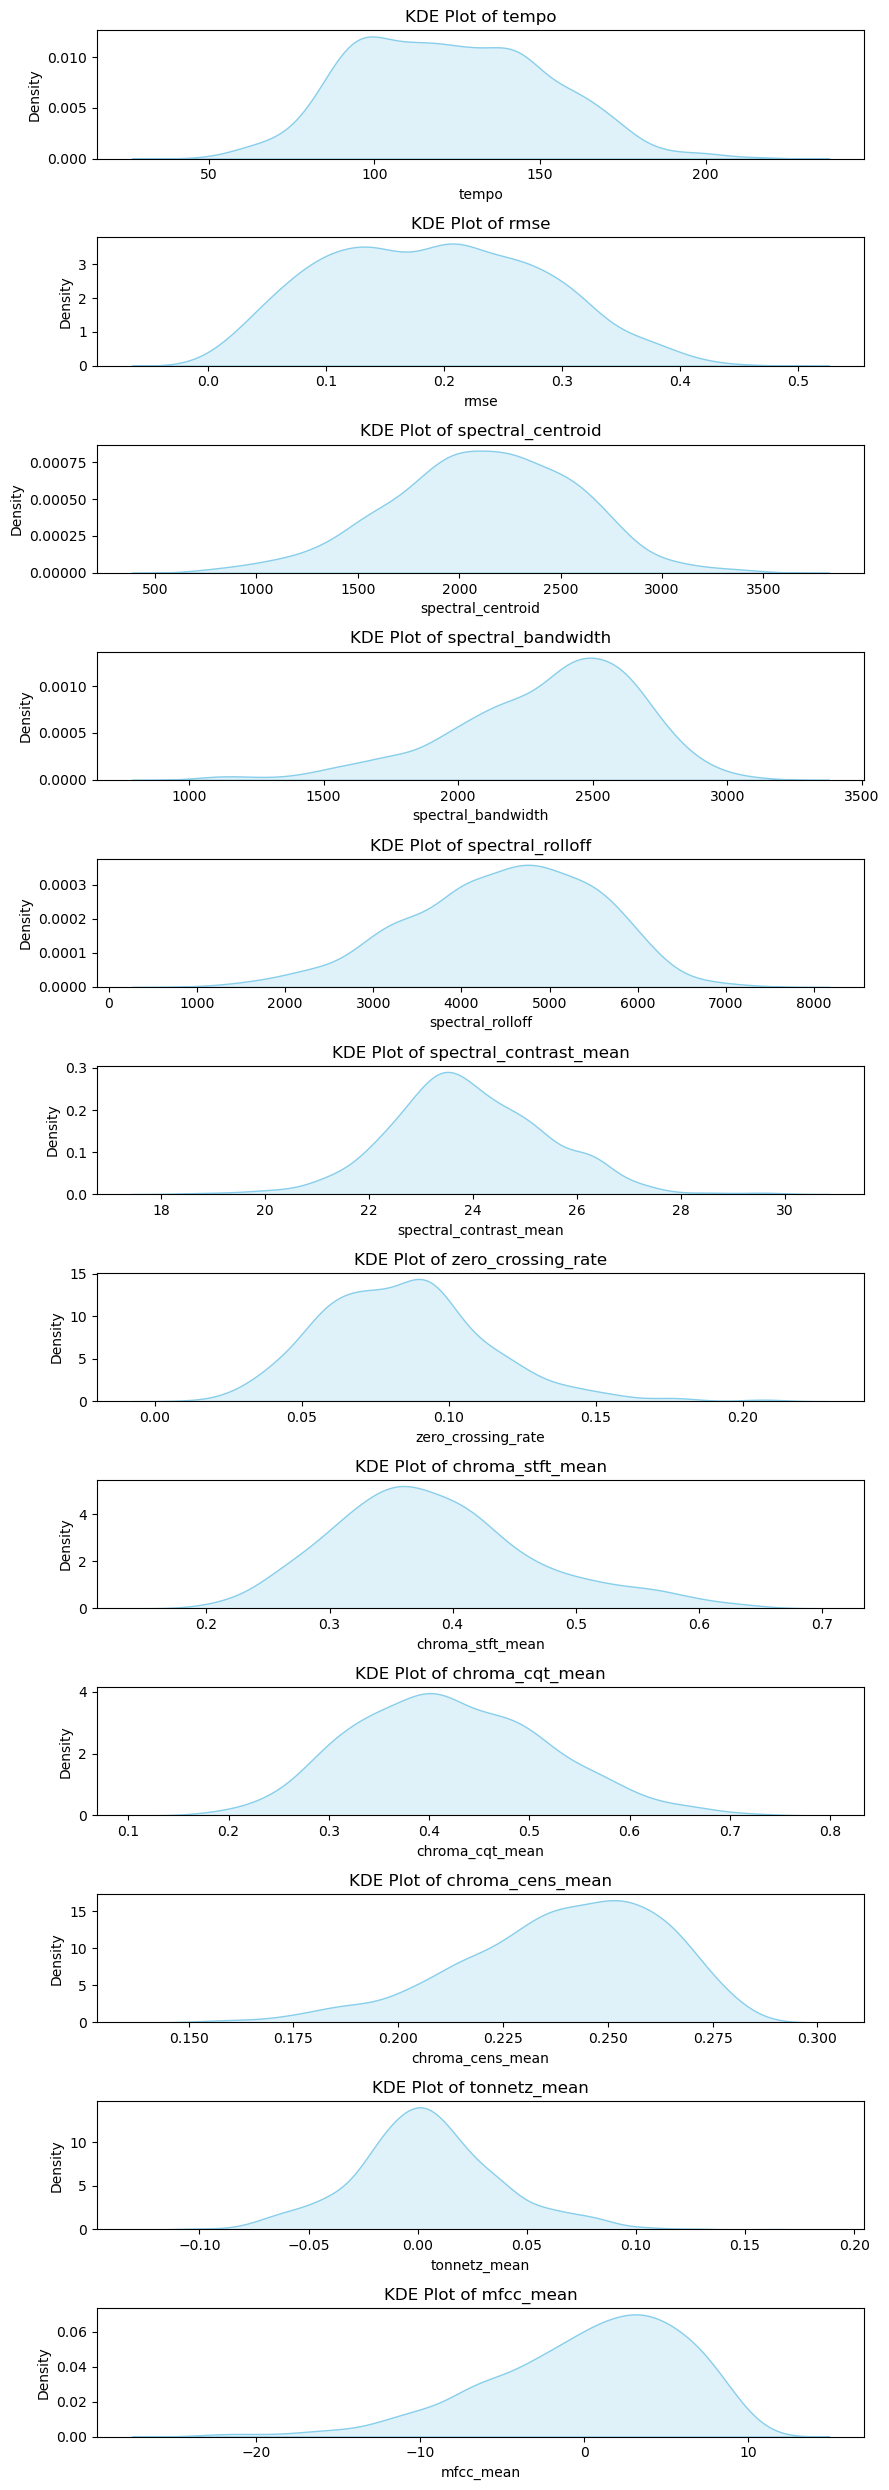

In [21]:
# KDE plots for numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(9, 25))

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=final_df[col], ax=axes[i], color='skyblue', fill=True)
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

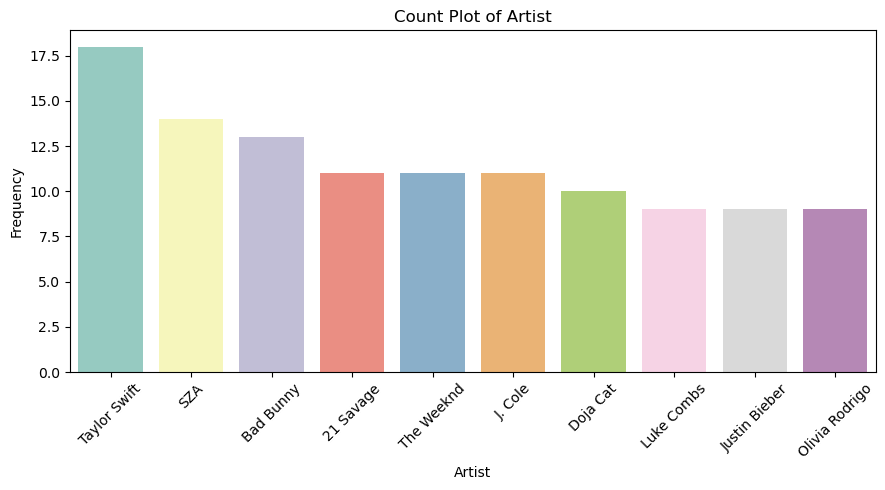

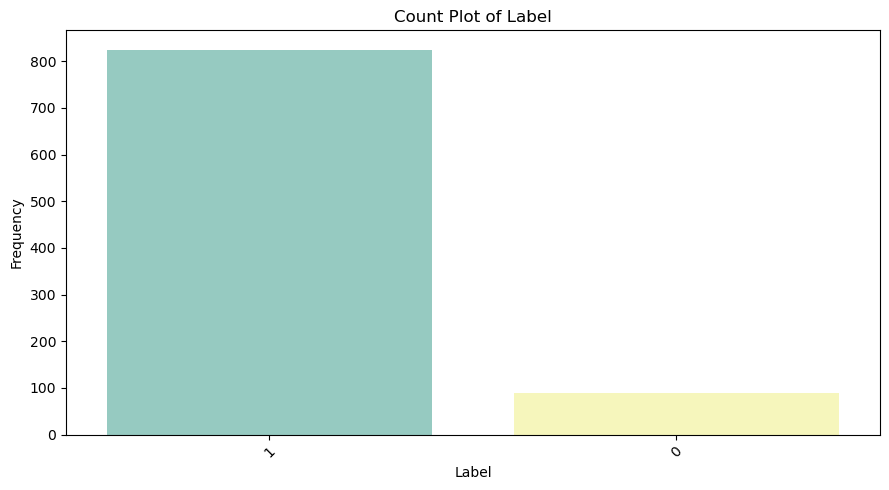

In [22]:
# Creating count plots for categorical variables
categorical_columns = ['Artist', 'Label']

for col in categorical_columns:
    # Getting the top categories
    top_categories = final_df[col].value_counts().head(10).index
    
    # Filtering the DataFrame for the top 10 categories
    df_top_categories = final_df[final_df[col].isin(top_categories)]
    
    # Creating count plot
    plt.figure(figsize=(9, 5))
    sns.countplot(data=df_top_categories, x=col, order=top_categories, palette='Set3')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

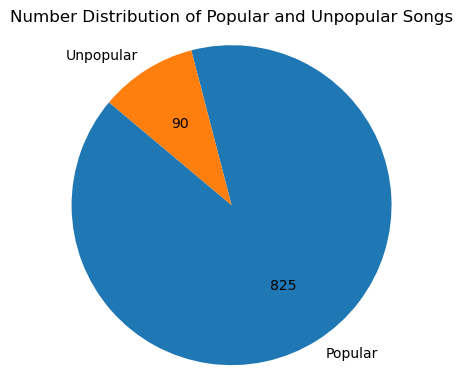

In [47]:
# Creating a copy of the DataFrame to avoid modifying the original dataset
final_df_copy = final_df.copy()

# Renaming labels in the copied DataFrame
final_df_copy['Label'] = final_df_copy['Label'].replace({1: 'Popular', 0: 'Unpopular'})

# Calculating number of popular and unpopular songs
label_counts = final_df_copy['Label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * total / 100), startangle=140)
plt.title('Number Distribution of Popular and Unpopular Songs')
plt.axis('equal')  # Making equal aspect ratio ensures that pie is drawn as a circle. (Note)
plt.tight_layout()
plt.show()

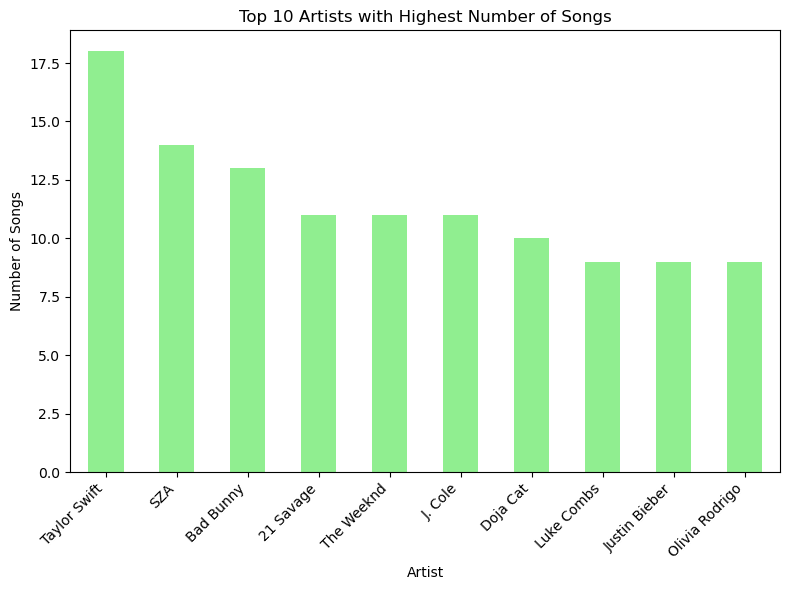

In [48]:
# Taking artists with highest number of songs in the dataframe
top_artists = final_df['Artist'].value_counts().nlargest(10)

# Plotting bar graph
plt.figure(figsize=(8, 6))
top_artists.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Artists with Highest Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\Basan\AppData\Local\Temp\ipykernel_9508\445866196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taylor_swift_songs['Label'] = taylor_swift_songs['Label'].replace({1: 'Popular', 0: 'Unpopular'})


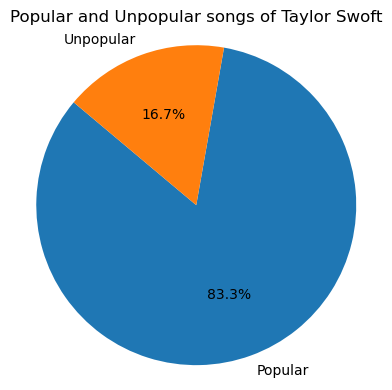

In [43]:
# Filtering for Taylor Swift's songs
taylor_swift_songs = final_df[final_df['Artist'] == 'Taylor Swift']

# Renaming labels
taylor_swift_songs['Label'] = taylor_swift_songs['Label'].replace({1: 'Popular', 0: 'Unpopular'})

# Calculating percentage distribution of labels
label_counts = taylor_swift_songs['Label'].value_counts()
labels = label_counts.index
sizes = label_counts.values
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

# Plotting pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Popular and Unpopular songs of Taylor Swoft')
plt.axis('equal')  # Making equal aspect ratio ensures that pie is drawn as a circle. (Note)
plt.tight_layout()
plt.show()


In [23]:
# Computing pairwise correlation
correlation_matrix = final_df[['tempo', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'spectral_contrast_mean', 'zero_crossing_rate', 'chroma_stft_mean', 'chroma_cqt_mean', 'chroma_cens_mean', 'tonnetz_mean', 'mfcc_mean']].corr()

# Correlation matrix
print("Pairwise correlation matrix:")
print(correlation_matrix)

Pairwise correlation matrix:
                           tempo      rmse  spectral_centroid  \
tempo                   1.000000  0.063913          -0.023623   
rmse                    0.063913  1.000000           0.200631   
spectral_centroid      -0.023623  0.200631           1.000000   
spectral_bandwidth     -0.018994  0.401135           0.873102   
spectral_rolloff       -0.011187  0.315787           0.966922   
spectral_contrast_mean -0.012573 -0.130982          -0.206417   
zero_crossing_rate     -0.071010 -0.211502           0.770690   
chroma_stft_mean        0.110443  0.446408           0.133224   
chroma_cqt_mean        -0.036898 -0.028329           0.173420   
chroma_cens_mean       -0.051903 -0.007050           0.256144   
tonnetz_mean           -0.019941 -0.010703          -0.037985   
mfcc_mean               0.017419  0.786678           0.166329   

                        spectral_bandwidth  spectral_rolloff  \
tempo                            -0.018994         -0.011187 

C:\Users\Basan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


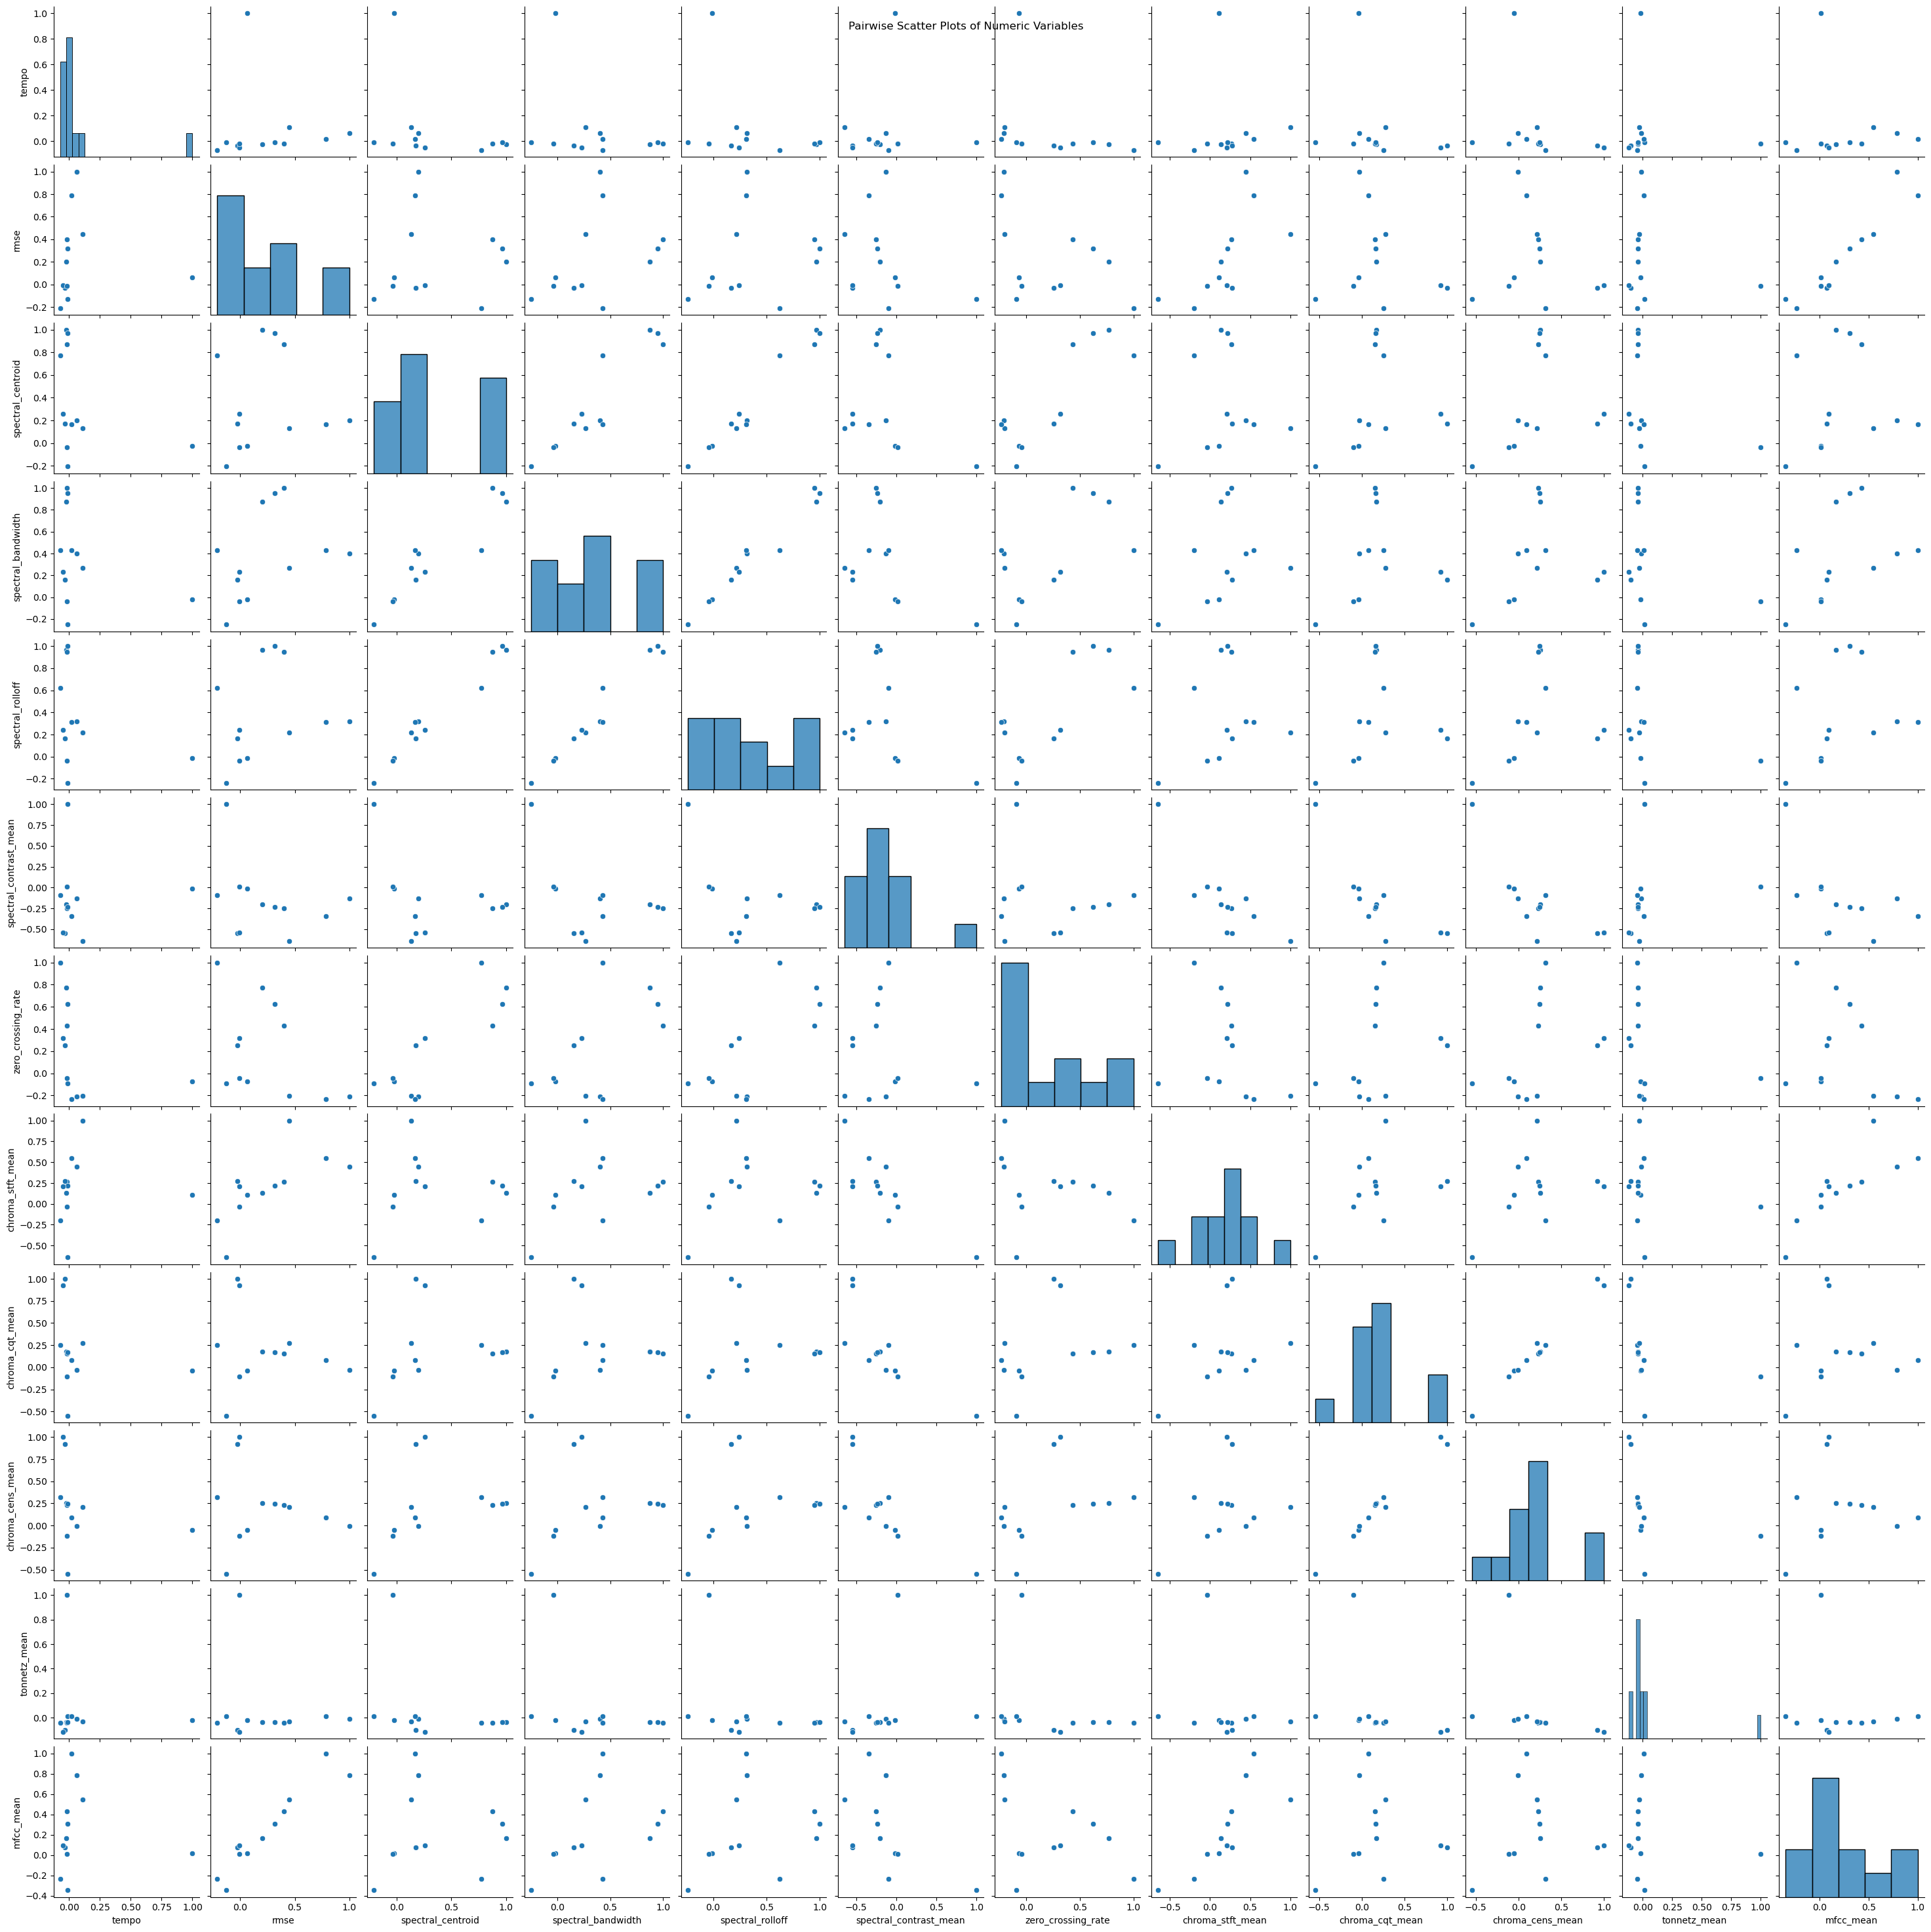

In [24]:
# Visualizing relationships between all pairs of numeric variables using scatter plots
sns.pairplot(correlation_matrix)
plt.suptitle("Pairwise Scatter Plots of Numeric Variables")
plt.show()

C:\Users\Basan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


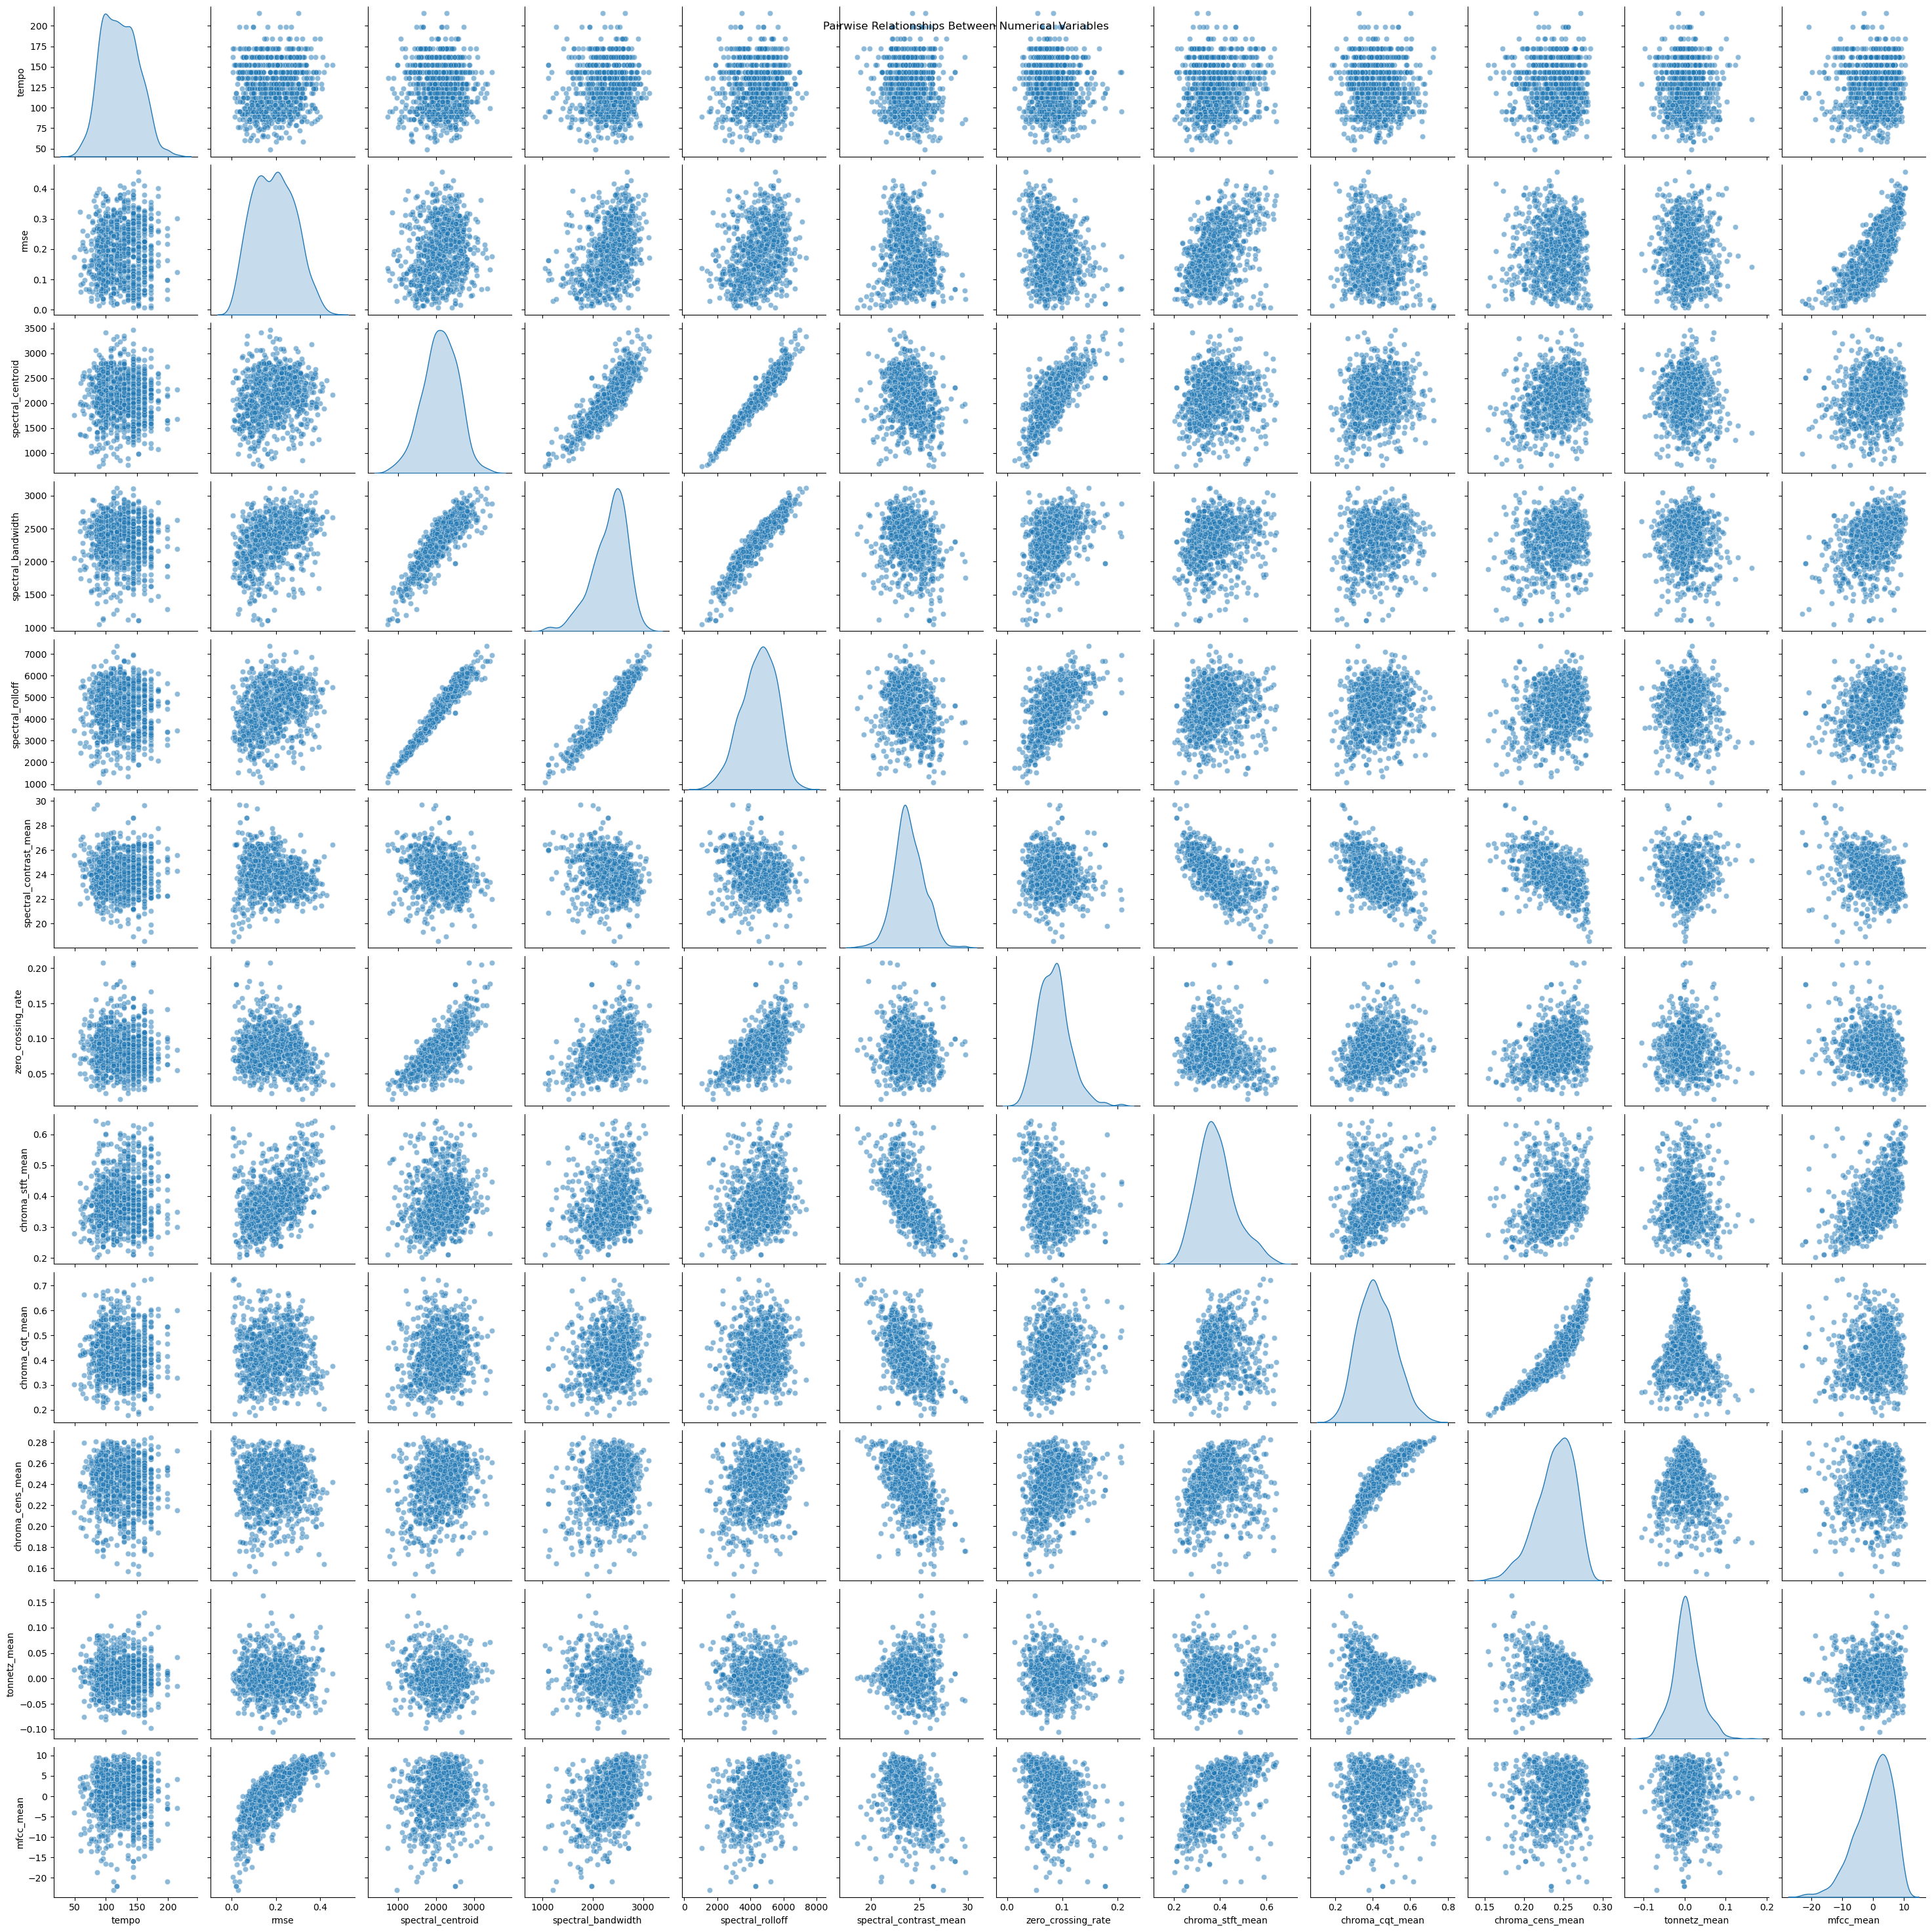

In [25]:
# Creating pair plot for the selected numerical variables
sns.pairplot(final_df[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships Between Numerical Variables')
plt.show()

# Multivariate Analysis

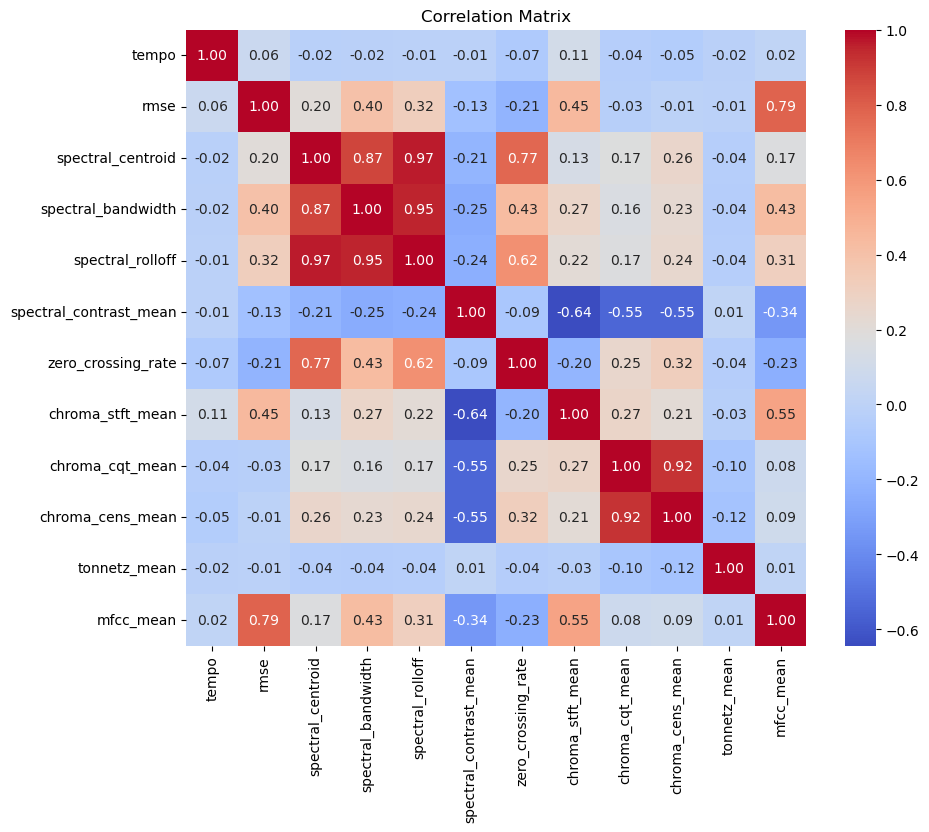

In [26]:
# Visualizing correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

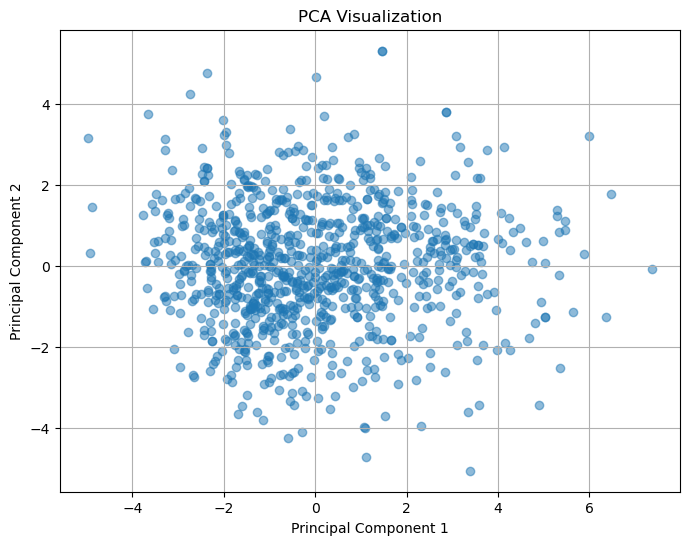

Explained variance ratio: [0.34117277 0.19443979]


In [27]:
# Importing libraries for calculating principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading data
data = final_df[numeric_columns]

X = data

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing Principal Component Analysis
pca = PCA(n_components=2)  # Adjusting to 2 dimension
X_pca = pca.fit_transform(X_scaled)

# Visualizing PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


The total variance explained by the principal components is around 53.56%. Generally, a higher percentage of explained variance is desirable as it indicates that the principal components capture a significant amount of information from the original data.